In [1]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

#import r2
from sklearn.metrics import r2_score

import env
import acquire as a
import wrangle as w
import explore as e
import prepare as p
import evaluate as eva

import warnings
warnings.filterwarnings("ignore")

In [2]:
#get data
df = w.wrangle_zillow()
df

csv file found and loaded


,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,lotsizesquarefeet,poolcnt,propertycountylandusecode,regionidcity,...,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,latitude_dd,longitude_dd,LA,Orange,Ventura
77578,12826780,2.0,3.0,1762.0,LA,0.0,6347.0,0.0,0100,14634.0,...,6317.15,6.037503e+13,0.007204,2017-09-25,Single Family Residential,33.937685,-117.996709,1,0,0
77577,12773139,1.0,3.0,1032.0,LA,0.0,5074.0,0.0,0100,36502.0,...,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential,34.040895,-118.038169,1,0,0
77576,17239384,2.0,4.0,1612.0,Ventura,1.0,12105.0,0.0,1111,27110.0,...,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential,34.300140,-118.706327,0,0,1
77575,11000655,2.0,2.0,1286.0,LA,0.0,47405.0,0.0,0100,12447.0,...,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential,34.245368,-118.282383,1,0,0
77385,12808835,2.0,3.0,1116.0,LA,0.0,6153.0,0.0,0100,39306.0,...,3554.26,6.037407e+13,0.058076,2017-09-19,Single Family Residential,34.044604,-117.974827,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,12069064,1.0,2.0,738.0,LA,0.0,4214.0,0.0,0100,45457.0,...,2366.08,6.037302e+13,0.101723,2017-01-01,Single Family Residential,34.149214,-118.239357,1,0,0
6,12095076,3.0,4.0,2962.0,LA,0.0,63000.0,1.0,0101,47019.0,...,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,34.145202,-118.179824,1,0,0
3,12177905,3.0,4.0,2376.0,LA,0.0,13038.0,1.0,0101,396551.0,...,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,34.245180,-118.240722,1,0,0
2,14186244,2.0,3.0,1243.0,Orange,0.0,8432.0,1.0,122,21412.0,...,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential,33.886168,-117.823170,0,1,0


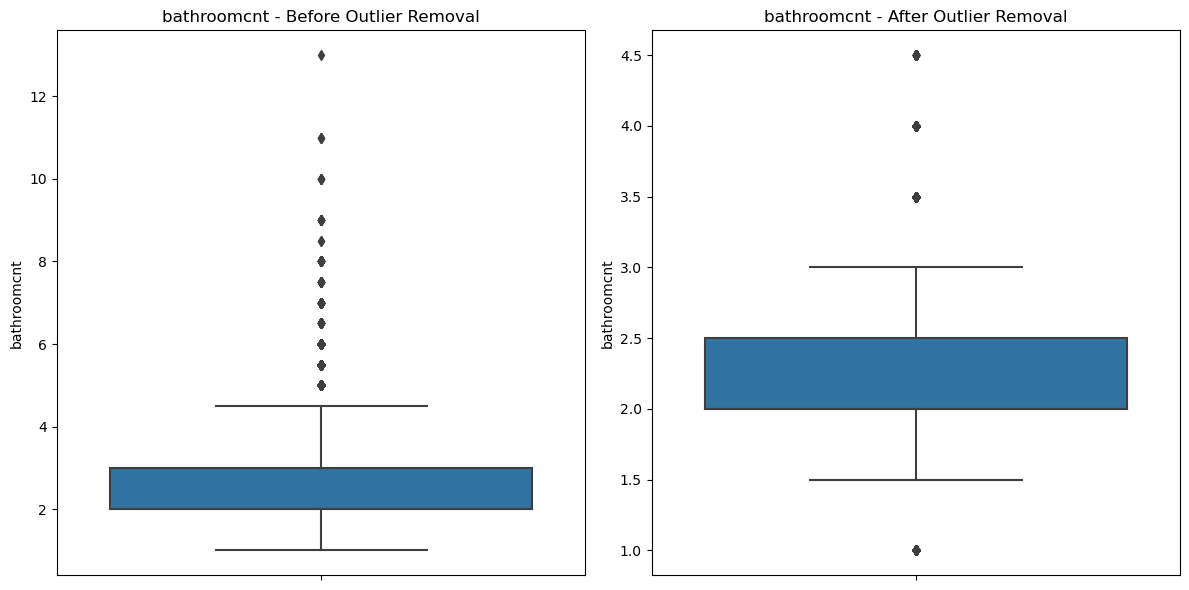

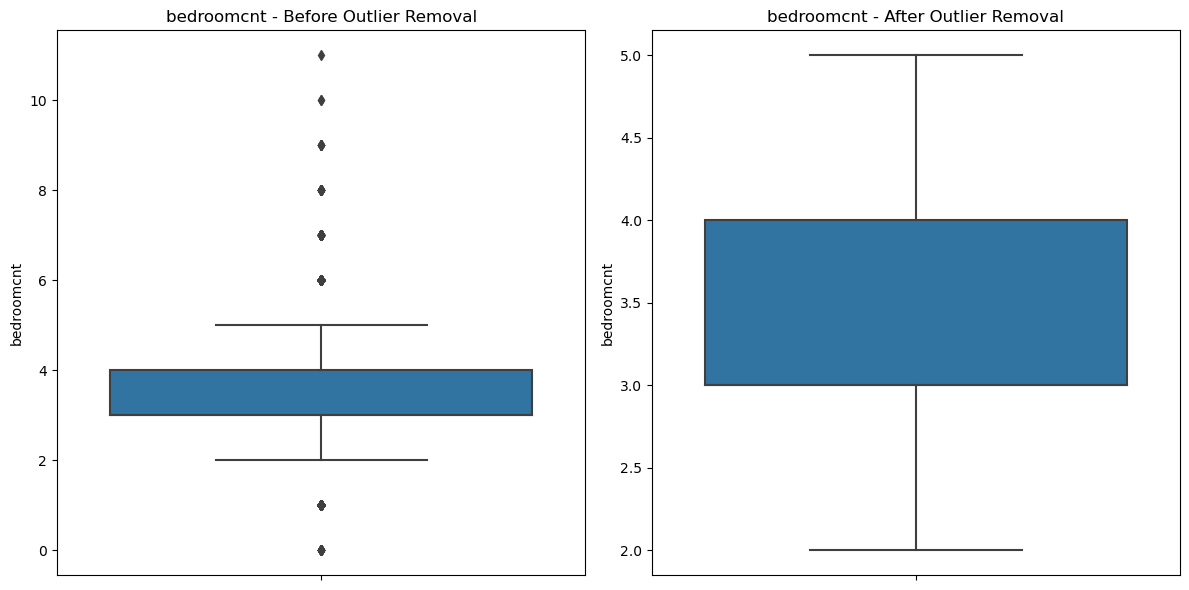

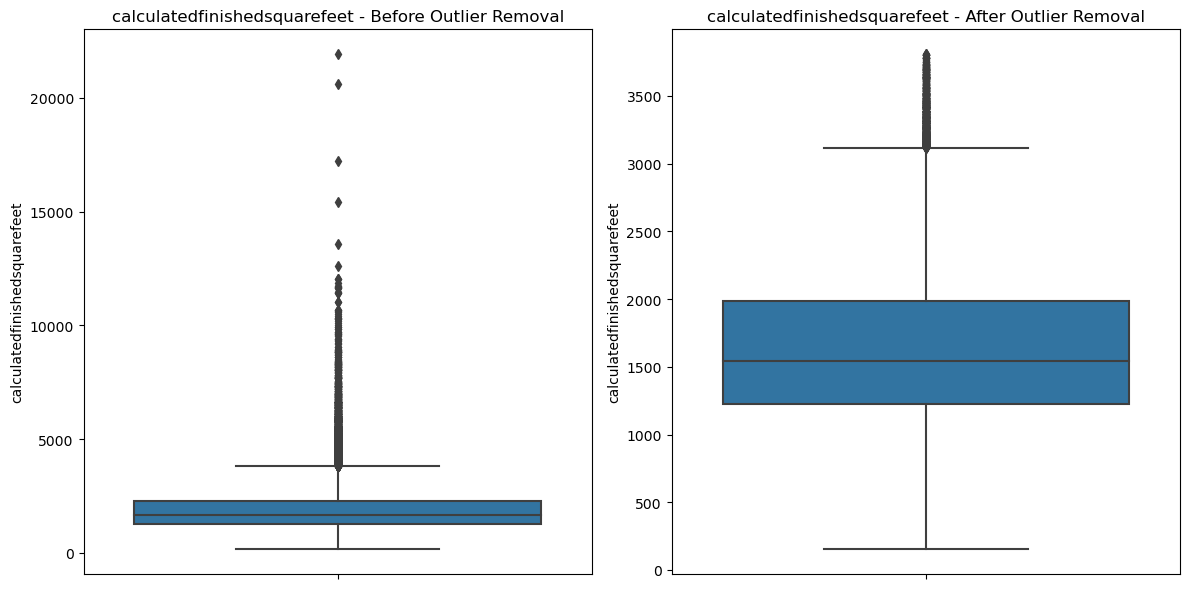

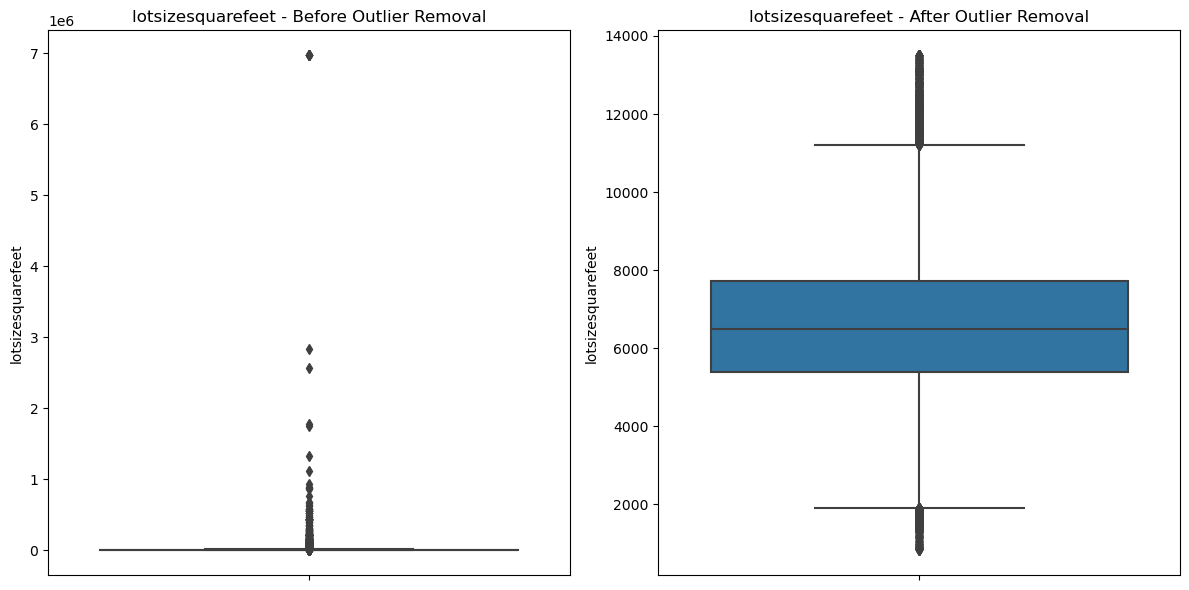

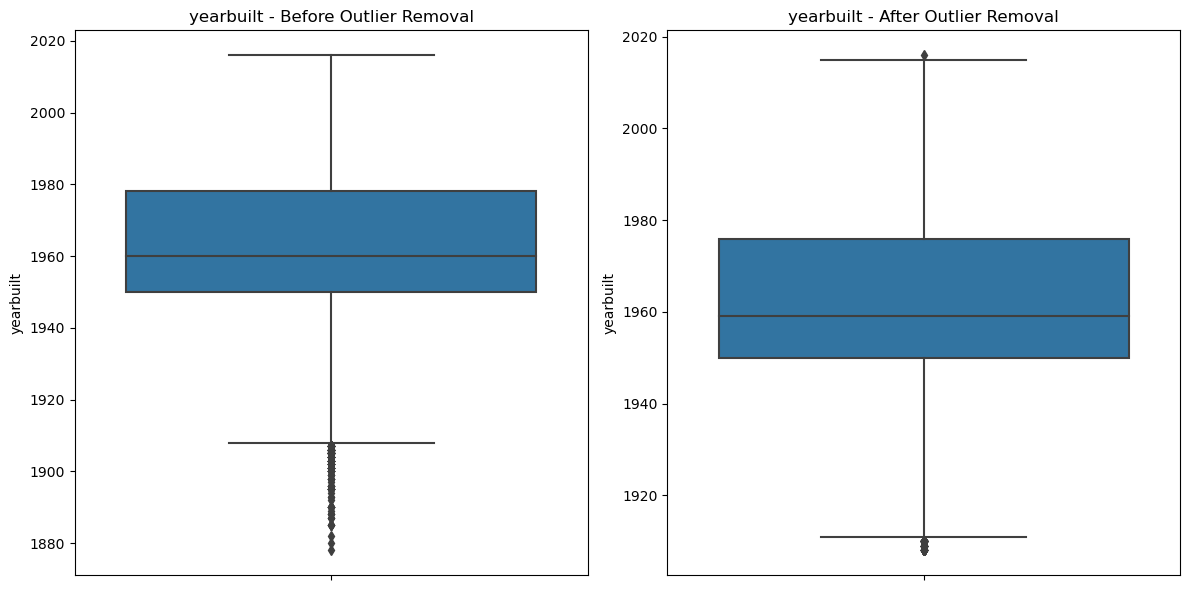

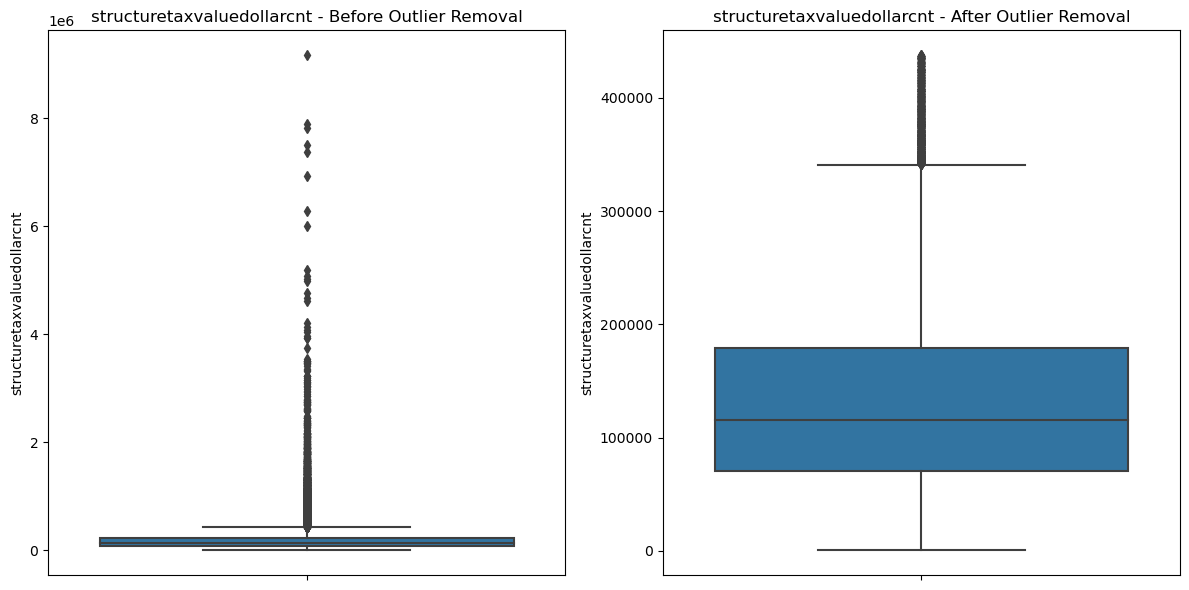

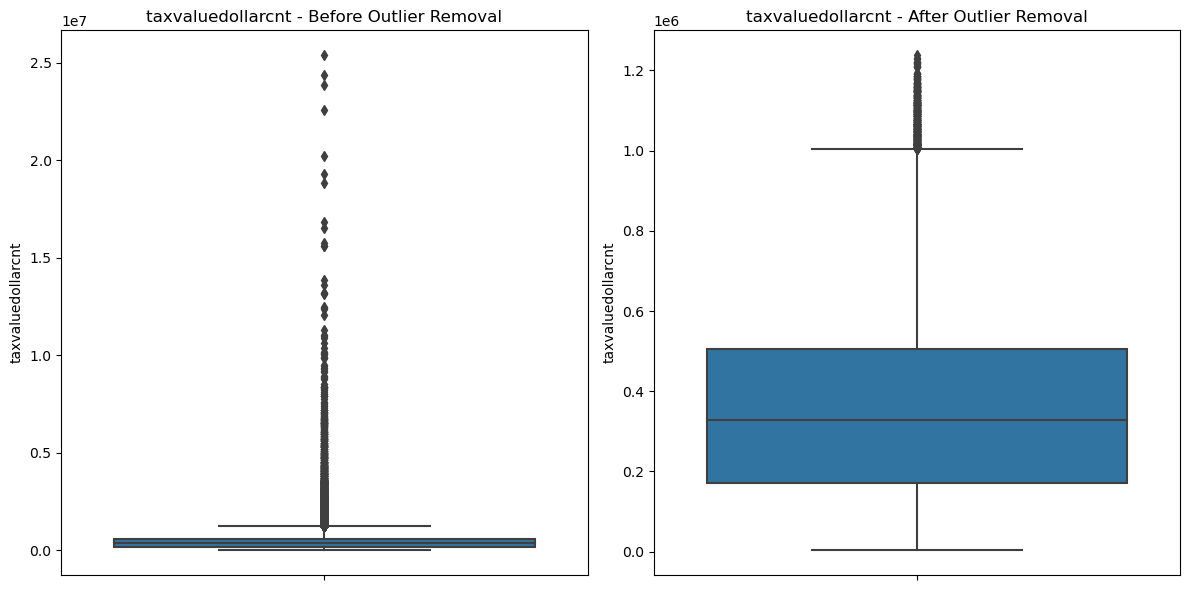

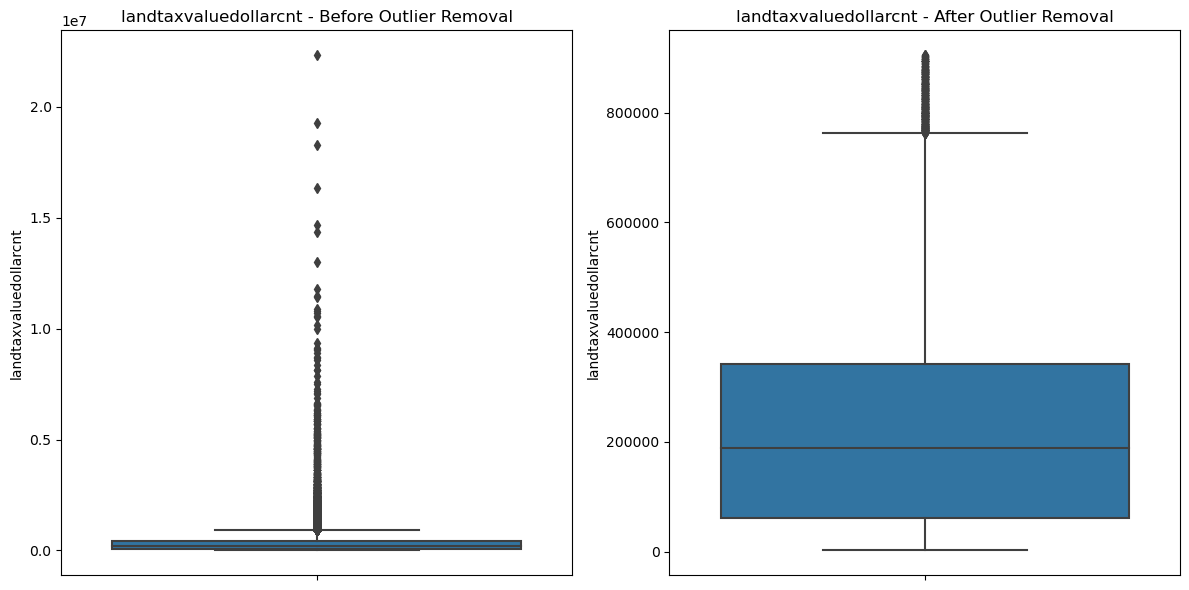

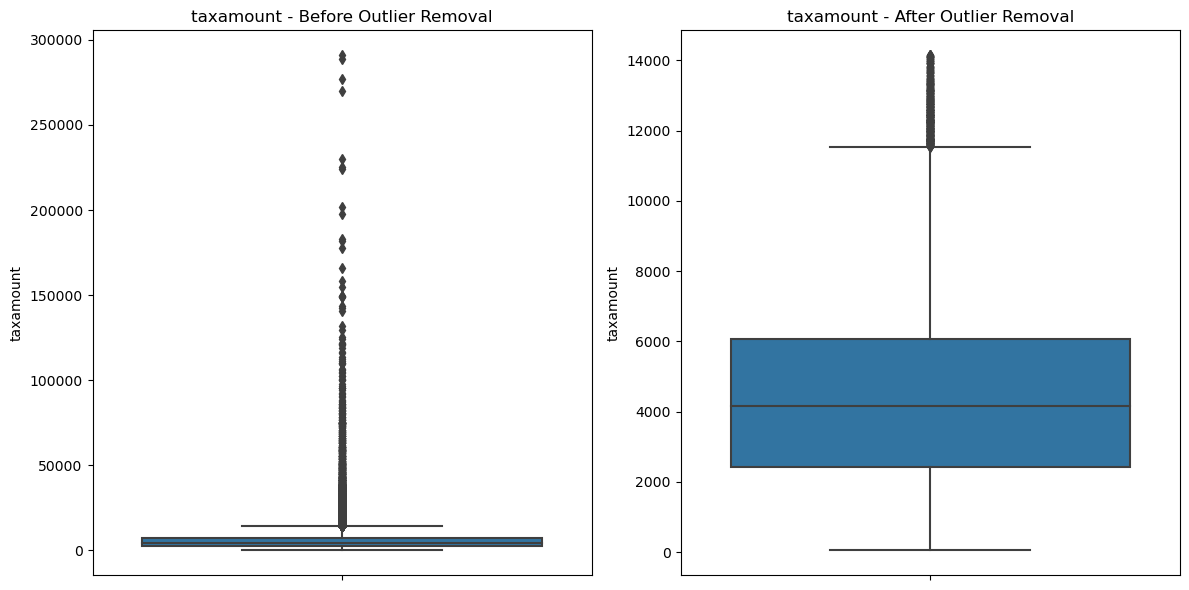

In [3]:
#run function, excluding columns that outlier detection isn't needed
df_clean, summary = w.remove_outliers(df, exclude_columns=['parcelid','fips','propertycountylandusecode',
                                                         'regionidcity','regionidzip','censustractandblock', 'poolcnt',
                                                         'fireplacecnt','logerror',
                                                         'latitude_dd', 'longitude_dd', 'LA','Orange','Ventura'])

In [4]:
df = df_clean
df.T

,77578,77577,77576,77385,77396,77395,77394,77392,77389,77388,...,66,65,70,71,72,73,1,7,3,2
parcelid,12826780,12773139,17239384,12808835,13061181,13062405,11388980,12620810,11148930,12247692,...,14432426,13091973,11018202,10808296,11023776,12871444,17052889,12069064,12177905,14186244
bathroomcnt,2.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,...,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,3.0,2.0
bedroomcnt,3.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,...,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,4.0,3.0
calculatedfinishedsquarefeet,1762.0,1032.0,1612.0,1116.0,2383.0,1733.0,1518.0,2500.0,3208.0,1456.0,...,1481.0,1463.0,812.0,2406.0,776.0,1059.0,1465.0,738.0,2376.0,1243.0
fips,LA,LA,Ventura,LA,LA,LA,LA,LA,LA,LA,...,Orange,LA,LA,LA,LA,LA,Ventura,LA,LA,Orange
fireplacecnt,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
lotsizesquarefeet,6347.0,5074.0,12105.0,6153.0,6341.0,13056.0,5799.0,6768.0,5355.0,5369.0,...,10112.0,12113.0,7150.0,7245.0,7055.0,7215.0,12647.0,4214.0,13038.0,8432.0
poolcnt,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
propertycountylandusecode,0100,0100,1111,0100,0101,0100,0100,0100,0100,0100,...,122,0100,0100,0100,0100,0100,1110,0100,0101,122
regionidcity,14634.0,36502.0,27110.0,39306.0,20008.0,20008.0,116042.0,118878.0,54311.0,12447.0,...,17686.0,34636.0,12447.0,12447.0,12447.0,20008.0,13091.0,45457.0,396551.0,21412.0


In [5]:
#split data
train, validate, test = p.split_data(df)
train.head().T

,67433,55668,44234,11948,76822
parcelid,10730153,13855139,11846026,17134561,11682436
bathroomcnt,3.0,2.0,2.0,2.5,4.0
bedroomcnt,4.0,4.0,3.0,4.0,3.0
calculatedfinishedsquarefeet,1607.0,1361.0,1186.0,1709.0,2397.0
fips,LA,Orange,LA,Ventura,LA
fireplacecnt,0.0,1.0,0.0,1.0,0.0
lotsizesquarefeet,8247.0,6292.0,5073.0,8010.0,6228.0
poolcnt,1.0,1.0,0.0,0.0,0.0
propertycountylandusecode,0101,122,0100,1111,0100
regionidcity,12447.0,18874.0,6021.0,51239.0,12520.0


In [ ]:
#scale data for modeling later

## Q.1 Is logerror significantly different for properties in LA County vs Orange County vs Ventura County??


what kind of variables do i have?
- fips: categorical
- logerror: continuous

what types of plots can i use?
- barplot

what type of stats test should i use? 
- normal distribution -- Yes
    - ANOVA

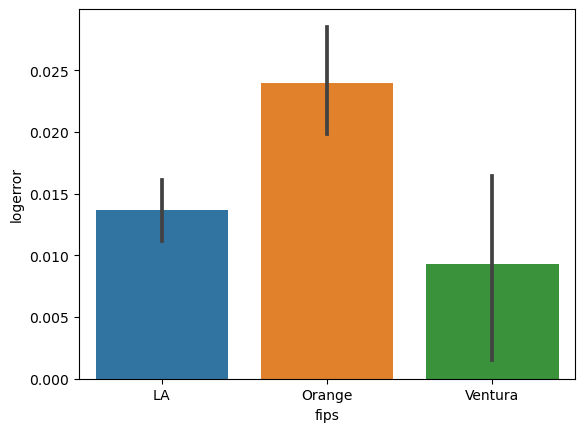

In [10]:
#visualize my variables
sns.barplot(x=train.fips, y=train.logerror)
plt.show()

ANOVA
- $H_0$: there is no difference in logerror between the three locations
- $H_a$: there is a difference in the logerror between the three locations

alpha = 0.05

In [11]:
#verify with stats
# set three separate categories to Tax_Value and compare them
la = train[train.fips == 'LA'].logerror
orange = train[train.fips == 'Orange'].logerror
ventura = train[train.fips == 'Ventura'].logerror

# run the ANOVA test
tstat, pval = stats.f_oneway(la, orange, ventura)
tstat, pval

(10.929175894328072, 1.8015569234651453e-05)

result: my p-value is less than alpha so we can reject the null hypothesis and infer that a difference exists between the logerror in the three locations

In [ ]:
Takeaways:
- the logerrors are greatest in Orange, LA, and Ventura (respectively)

## Q.2 Does a relationship exist between the taxvaluedollarcnt and logerror?

what kind of variables do i have?
- taxvaluedollarcnt: continuous
- logerror: continuous

what types of plots can i use?
- scatter

what type of stats test should i use? 
- normal distribution?
    - pearsonr


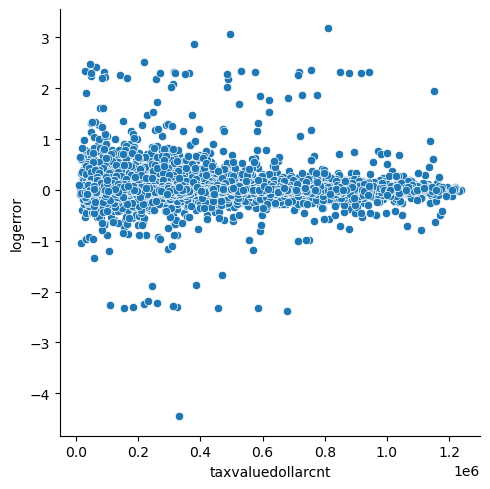

In [26]:
#visualize my variables
sns.relplot(x=train.taxvaluedollarcnt, y=train.logerror)
plt.show()

pearsonr
- $H_0$: There is not a linear relationship between taxvaluedollarcnt and logerror
- $H_a$: There is a linear relationship between taxvaluedollarcnt and logerror

alpha = 0.05



In [19]:
#verify with stats
stats.pearsonr(train.taxvaluedollarcnt,train.logerror)

PearsonRResult(statistic=-0.02343938549617684, pvalue=0.00025375881040684106)

result: my p-value is less than alpha and can reject the null hypothesis. We can infer a linear relationship between the two variables. 

Takeaways:
- There is a strong linear relationship between the two variables
- This is probably because logerror is derived from the zestimate which is derived from taxvalue

## Q.3 Does the year built have a relationship with logerror?

In [ ]:
what kind of variables do i have?
- yearbuilt: continuous
- logerror: continuous

what types of plots can i use?
- scatter

what type of stats test should i use? 
- normal distribution?
    - pearsonr


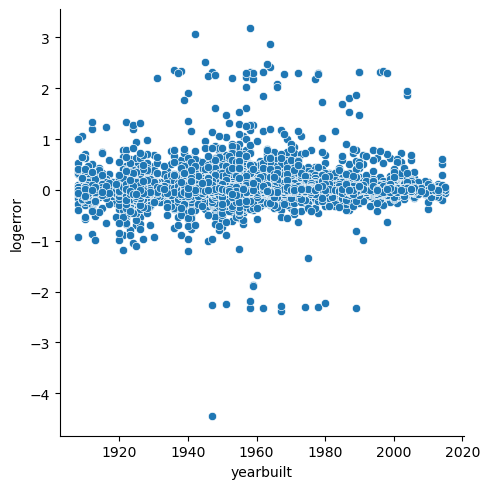

In [27]:
#visualize my variables
sns.relplot(x=train.yearbuilt, y=train.logerror)
plt.show()

pearsonr
- $H_0$: There is not a relationship between yearbuilt and logerror
- $H_a$: There is a relationship between yearbuilt and logerror

alpha = 0.05

In [28]:
#verify with stats
stats.pearsonr(train.yearbuilt, train.logerror)

PearsonRResult(statistic=0.012043069991243941, pvalue=0.06017611339885427)

result: my p-value is greater than alpha, therefore I fail to reject the null hypothesis. There is appears to not be a relationship between yearbuilt and logerror. 

Takeaways:
- the graph appears to show a relationship, however the stats test reveals that there is not.

## Q.4 Does the calculatedfinishedsquarefeet and logerror have a relationship?

what kind of variables do i have?
- calculatedfinishedsquarefeet: continuous
- logerror: continuous

what types of plots can i use?
- scatter

what type of stats test should i use? 
- normal distribution?
    - pearsonr


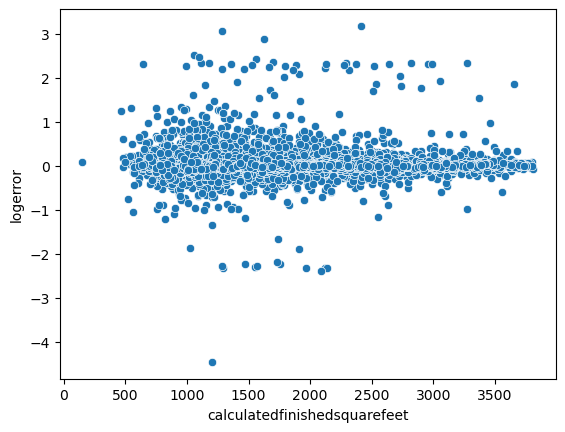

In [30]:
#visualize my variables
sns.scatterplot(x=train.calculatedfinishedsquarefeet, y=train.logerror)
plt.show()

pearsonr
- $H_0$: There is not a relationship between calculatedfinishedsquarefeet and logerror.
- $H_a$: There is a relationship between calculatedfinishedsquarefeet and logerror.

alpha = 0.05

In [31]:
#verify with stats
stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)

PearsonRResult(statistic=0.01730612406273005, pvalue=0.0069134751729296945)

result: my p-value is less than alpha so we reject the null hypothesis and can infer a relationship between calculatedfinishedsquarefeet and logerror. 

Takeaways:
- the graph appears to show a linear relationship between calculatedfinishedsquarefeet and logerror.
- the stats test confirms this

## Q.5 Does bedroomcnt and logerror have a relationship? 

what kind of variables do i have?
- bedroomcnt: discrete - categorical
- logerror: continuous

what types of plots can i use?
- barplot, stripplot, boxplot

what type of stats test should i use? 
- normal distribution?
    - check for variance... if false then set in ttest
    - ttest ind?


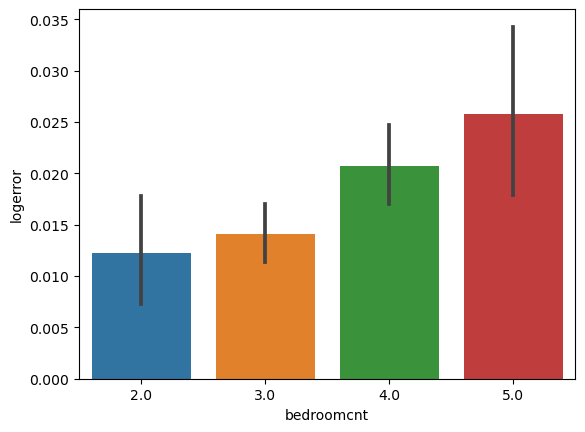

In [38]:
# Visualize variables
sns.barplot(x=train.bedroomcnt, y=train.logerror)
plt.show()

TTest
- $H_0$: There is not a relationship between bedroomcnt and logerror
- $H_a$: There is a relationship between bedroomcnt and logerror

alpha = 0.05

In [39]:
#check for equal variances 
stats.levene(train.bedroomcnt, train.logerror)

LeveneResult(statistic=15804.303001178754, pvalue=0.0)

In [40]:
#verify with a stats test
stats.ttest_ind(train.bedroomcnt,train.logerror,equal_var=False)

Ttest_indResult(statistic=620.46686848041, pvalue=0.0)

result: my variances are not equal (set in stats test). my p-value is less than alpha so I can reject the null hypothesis and can infer a relationship exists between bedroomcnt and logerror.

Takeaways:
- the logerror appears to increase with increase in rooms

## Q.6 Does regionidzip and logerror have a relationship? 

what kind of variables do i have?
- regionidzip: categorical
- logerror: continuous

what types of plots can i use?
- barplot, stripplot, boxplot

what type of stats test should i use? 
- normal distribution?
    - check for variance... if false then set in ttest
    - ttest ind?

In [89]:
train.regionidzip.nunique()

370

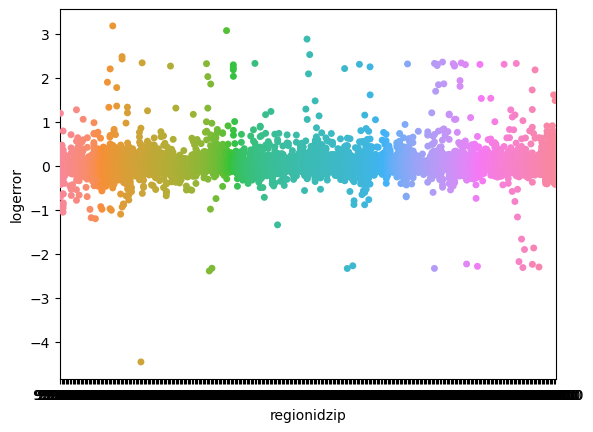

In [88]:
# Visualize variables
sns.stripplot(x=train.regionidzip, y=train.logerror)
plt.show()

what ttest?
- $H_0$: There is not a relationship between regionidzip and logerror
- $H_a$: There is a relationship between regionidzip and logerror

alpha = 0.05



In [53]:
#check for equal variances 
stats.levene(train.bedroomcnt, train.logerror)

LeveneResult(statistic=15804.303001178754, pvalue=0.0)

In [54]:
#verify with a stats test
stats.ttest_ind(train.regionidzip,train.logerror,equal_var=False)

Ttest_indResult(statistic=35761.583881855295, pvalue=0.0)

result: my variances are not equal (set in stats test). my p-value is less than alpha so I can reject the null hypothesis and can infer a relationship exists between regionidzip and logerror.

# Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [87]:
# Compute the mean(logerror) by zipcode
zipcode_means = df.groupby('regionidzip')['logerror'].mean()

# Compute the overall mean(logerror)
overall_mean = df['logerror'].mean()

print(zipcode_means)
print(overall_mean)

regionidzip
95982.0    -0.000949
95983.0     0.006239
95984.0    -0.087475
95985.0    -0.044551
95986.0     0.012959
              ...   
97324.0    -0.002351
97328.0     0.019464
97329.0     0.015241
97330.0     0.010125
399675.0    0.028673
Name: logerror, Length: 374, dtype: float64
0.01610074509623208
